In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  confusion_matrix,
  ConfusionMatrixDisplay,
  classification_report,
)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

1. Найти данные для классификации. Данные в группе повторяться не
   должны. Предобработать данные, если это необходимо.


In [2]:
from sklearn import datasets
df = pd.read_csv("data/WHR_2023.csv")
df = df.drop(["country"], axis=1)
df = df.dropna(axis=0)

pd.set_option("display.max_columns", None)
print(df.isna().sum())
display(df.head())

region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


2. Изобразить гистограмму, которая показывает баланс классов. Сделать
   выводы.


Кол-во классов: 3


<BarContainer object of 3 artists>

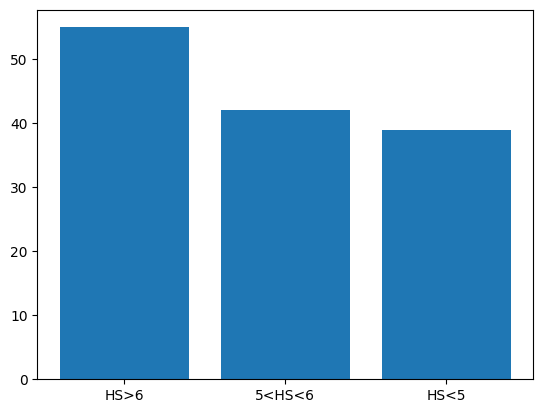

In [3]:
dataClass = 'happiness_score'
bins = [-np.inf, 5, 6, np.inf]
labels = ['HS<5', '5<HS<6', 'HS>6']
df['happiness_score'] = pd.cut(df['happiness_score'], bins=bins, labels=labels)
dataClassCount = len(df[dataClass].unique())
print(f"Кол-во классов: {dataClassCount}")
display(plt.bar(df[dataClass].unique(), df[dataClass].value_counts().values))

3. Разбить выборку на тренировочную и тестовую. Тренировочная для
   обучения модели, тестовая для проверки ее качества.


In [4]:
RNG = 0
OutputPreviewSize = 25

x = df.drop(columns=[dataClass])
y = df[dataClass]

encoder = preprocessing.LabelEncoder()
for i in x.columns:
    x[i] = encoder.fit_transform(x[i])
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.90, shuffle=True, random_state=RNG
)
print(
    f'Train data features split size  {x_train.shape}\n'
    f'Train target feature split size {y_train.shape}\n'
    f'Test data features split size   {x_test.shape}\n'
    f'Test target feature split size  {y_test.shape}\n'
)

Train data features split size  (13, 7)
Train target feature split size (13,)
Test data features split size   (123, 7)
Test target feature split size  (123,)



4. Применить алгоритмы классификации: логистическая регрессия, SVM,
   KNN. Построить матрицу ошибок по результатам работы моделей
   (использовать confusion_matrix из sklearn.metrics).
5. Сравнить результаты классификации, используя accuracy, precision,
   recall и f1-меру (можно использовать classification_report из
   sklearn.metrics). Сделать выводы.


In [5]:
def output_results(model_predict):
    print("Predicted values: ", model_predict[:OutputPreviewSize])
    print("True values:      ", np.array(y_test[:OutputPreviewSize]))

    cm = confusion_matrix(y_test, model_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    print(classification_report(model_predict, y_test, zero_division=1))

Predicted values: 

 [2 2 0 0 0 1 2 2 2 2 0 0 0 2 0 1 2 1 1 0 2 2 0 0 1]
True values:       [2 2 2 1 2 0 2 2 2 2 0 0 0 2 2 1 0 1 1 0 0 2 0 2 0]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        48
           1       0.69      0.84      0.76        32
           2       0.76      0.88      0.82        43

    accuracy                           0.72       123
   macro avg       0.72      0.74      0.72       123
weighted avg       0.72      0.72      0.71       123



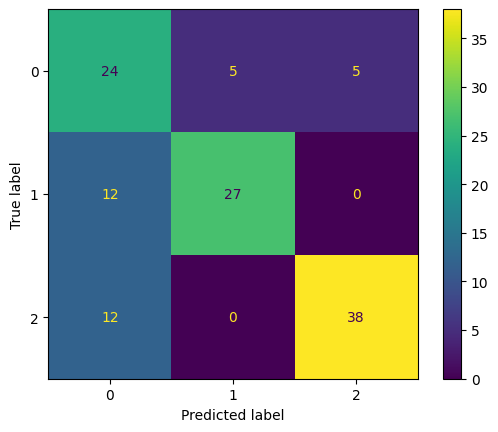

In [6]:
LR = LogisticRegression(max_iter=5000, random_state=0)
LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
output_results(LR_predict)

c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


SVM best model: poly
Predicted values:  [2 2 0 0 0 1 2 2 2 2 0 0 0 0 0 1 2 1 1 0 2 0 0 0 1]
True values:       [2 2 2 1 2 0 2 2 2 2 0 0 0 2 2 1 0 1 1 0 0 2 0 2 0]
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        52
           1       0.74      0.83      0.78        35
           2       0.64      0.89      0.74        36

    accuracy                           0.69       123
   macro avg       0.70      0.73      0.70       123
weighted avg       0.70      0.69      0.68       123



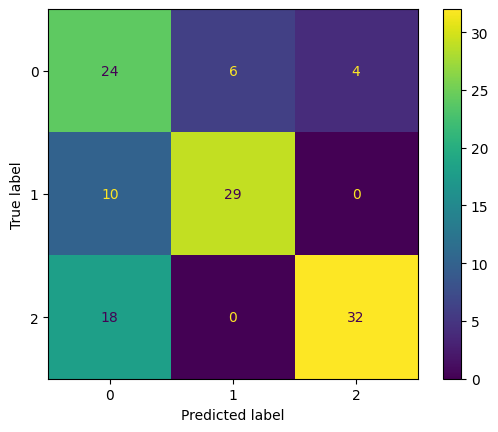

In [7]:
# SVM (support vector machine)
params = {"kernel": ("linear", "rbf", "poly", "sigmoid")}
gridSearch_SVM = GridSearchCV(estimator=SVC(random_state=RNG), param_grid=params, cv=4)
gridSearch_SVM.fit(x_train, y_train)
best_SVC = gridSearch_SVM.best_estimator_
print(f"SVM best model: {best_SVC.kernel}")
SVC_predict = best_SVC.predict(x_test)
output_results(SVC_predict)

KNN best model: KNeighborsClassifier(n_neighbors=3)
Best score: 0.6875
Predicted values:  [2 2 0 0 2 0 0 2 0 2 0 0 0 2 0 1 0 1 1 0 2 2 0 0 0]
True values:       [2 2 2 1 2 0 2 2 2 2 0 0 0 2 2 1 0 1 1 0 0 2 0 2 0]
              precision    recall  f1-score   support

           0       0.82      0.47      0.60        59
           1       0.69      0.90      0.78        30
           2       0.62      0.91      0.74        34

    accuracy                           0.70       123
   macro avg       0.71      0.76      0.71       123
weighted avg       0.74      0.70      0.68       123



c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


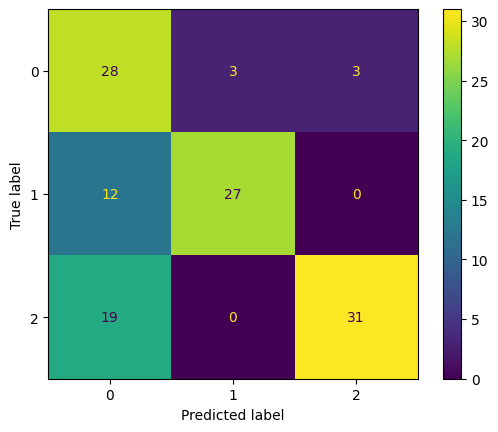

In [8]:
# KNN (K-Nearest Neighbors)
params = {"n_neighbors": np.arange(3, 10)}
gridSearch_KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=4)
gridSearch_KNN.fit(x_train.values, y_train)
print(f"KNN best model: {gridSearch_KNN.best_estimator_}")
print("Best score:", gridSearch_KNN.best_score_)
KNN_predict = gridSearch_KNN.predict(x_test.values)
output_results(KNN_predict)